In [1]:
import sys 
import math
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.pylab as plt
import matplotlib.path as mpath
from matplotlib.pyplot import figure
import numpy as np
import traceback
import imageio
import os, glob

In [2]:
#A define parameters 
#Define Parameters
Ns = 0.01 #1/s
L = 300000 #m
D = 15000 #m

#Part 1
#b = 10000 #m 
#d = 1000 #m 

#part 2
#large values b/d
b = 1000 #m
d = 10 #m

#euqal
b = 10000 #m
d = 10000#m

zo = 7000 #m
dt = 120 #s
tau = 7200 #s (i.e., use 60 time steps) 

#N= 50 #final answer use this
#M= 50 #final answer use this 
N= 20 #smaller for debugging 
M= 20 #smaller for debugging

#Nt = 60 #for final answer use this 
Nt = 51 #smaller for debugging 

#Nx = 201 #final answer use this 
Nx= 151 #smaller for debugging 

#Mz= 101 #final answer use this
Mz= 76 #smaller for debugging

dx = L/(Nx-1)
dz = D/(Mz-1)
dw=10 

In [3]:
#B. Discretize x & z 
#C. Build arrays representing wox(x) and woz(z) at the discretized x and z locations
wox_arr=np.zeros(Nx)
x_arr=np.zeros(Nx)
x_arr2=np.zeros(N)

for i in range(0,Nx):
    x_arr[i] = i*dx
    wox_arr[i]=dw/ (1+ (x_arr[i]- (L/2))**2 /b**2)
    
for i in range(0,N):
    x_arr2[i] = i*dx

z_arr=np.zeros(Mz)
woz_arr=np.zeros(Mz)

for i in range(0,Mz):
    z_arr[i] = i*dz
    woz_arr[i]=1/ (1+((z_arr[i]-zo)**2/d**2))

0.0

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.30971516e-04 2.75985155e-04 1.99486359e-04 1.48858142e-04
  1.16937946e-04 9.57260411e-05 8.08111727e-05 6.98210808e-05
  6.14145763e-05 5.47890589e-05 4.94390273e-05 4.50318480e-05
  4.13403570e-05 3.82044414e-05 3.55081553e-05 3.31655548e-05
  3.11116284e-05 2.92963160e-05 2.76804595e-05 2.62329982e-05]
 [6.60858046e-04 5.51340753e-04 3.98734776e-04 2.97617378e-04
  2.33827934e-04 1.91425772e-04 1.61606516e-04 1.39631952e-04
  1.22822204e-04 1.09573184e-04 9.88744296e-05 9.00609565e-05
  8.26785946e-05 7.64072100e-05 7.10149676e-05 6.63300152e-05
  6.22223535e-05 5.85918777e-05 5.53602828e-05 5.24654548e-05]
 [9.88592297e-04 8.25444392e-04 5.97508724e-04 4.46179131e-04


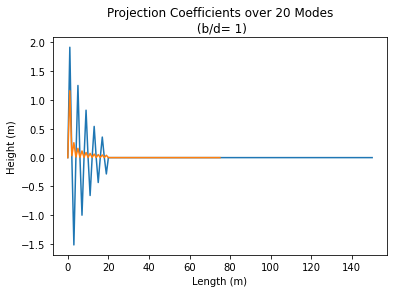

In [4]:
#D. Define the total number of modes N and M (start with 50 each… too many is computationally expensive).
#E. Define the wavenumbers k and m
#F. Write a loop to calculate the projection coefficients an and bj .

kn_arr=np.zeros(N)
mj_arr=np.zeros(M)
sum_arrN=np.zeros(Nx)
sum_arrM=np.zeros(Mz)
an_arr=np.zeros(Nx)
bj_arr=np.zeros(Mz)
w_arr=np.zeros((N,M))

for i in range (0, N):
    kn_arr[i]=i*np.pi/L
    sum_arrN=0
    for j in range (0,Nx):
        sum_arrN=sum_arrN + (wox_arr[j]*np.sin(kn_arr[i]* x_arr[j]))
    an_arr[i]= sum_arrN*(2/L)*dx  

print(kn_arr[0])
an_arr[0]=2*an_arr[0]        

for i in range (0, M):
    mj_arr[i]=i*np.pi/D
    sum_arrM=0
    for j in range (0,Mz):
        sum_arrM=sum_arrM + (woz_arr[j]*np.sin(mj_arr[i]* z_arr[j]))
    bj_arr[i]= sum_arrM*(2/D)*dz  
    
bj_arr[0]=2*bj_arr[0] 
                                 
#build frequency array 
for ik in range (0,N):
    for im in range (0,M):
        w_arr[ik,im]= np.sqrt((Ns**2 *kn_arr[ik]**2)/ (mj_arr[im]**2 +kn_arr[ik]**2 + 1e-7))

print()        
print(w_arr)
plt.title('Projection Coefficients over 20 Modes\n (b/d= 1)')
plt.xlabel('Length (m)')
plt.ylabel('Height (m)')
plt.plot(an_arr[:])
plt.plot(bj_arr[:])

In [ ]:
#G. Build the solution : 𝑤(𝑥, 𝑧,𝑡) = ∑ ∑ 𝑐𝑛
#sin(𝑘𝑛𝑥) sin(𝑚𝑗𝑧) cos(𝜔𝑛,𝑗𝑡)
#Here you will need to compute a double sum at every x, z, and t. You will also need to use the dispersion relation to link 
#the frequency to the wavenumbers

t_arr=np.zeros(Nt)
w_zxt=np.zeros((Nx,Mz,Nt))
#sum_w=np.zeros((Nx, Mz))

#sum over space & time 
for it in range(0,Nt):
    t_arr[it] = dt*it
    for ix in range (0,Nx):
        for iz in range (0,Mz):
            sum_w=0
            for ik in range (0,N):
                for im in range (0,M):
                    sum_w= sum_w + (an_arr[ik] *bj_arr[im] *np.sin(kn_arr[ik]* x_arr[ix]) *np.sin(mj_arr[im]*z_arr[iz]) *np.cos(w_arr[ik,im]*t_arr[it]))
            w_zxt[ix,iz,it]= sum_w
#print(w_zxt.shape)        
#print(w_zxt)    

In [ ]:
#need contour plots for solution   
plt.contourf(np.transpose(w_zxt[:,:,50]))
plt.colorbar()
plt.title('Time-Dependent Buoyancy Wave Solution\n')
plt.xlabel('Length (m)')
plt.ylabel('Height (m)')
plt.show()    

In [ ]:
for time_ in range (0, len(t_arr)):
    plt.contourf(np.transpose(w_zxt[:,:,0]))
    plt.colorbar();
    plt.title(f'Time-Dependent Buoyancy Wave Solution\n at time = {t_arr[time_]}')
    plt.xlabel('Length (m)')
    plt.ylabel('Height (m)')
    plt.savefig(f'{time_:02d}.png', dpi=150, bbox_inches='tight')
    plt.clf()

In [47]:
#put images in gif 
path ='Users/Anna/Desktop/WAVES'
png_list=sorted(glob.glob(path + '.*png'))
with imageio.get_writer('test.gif', mode='I') as writer: 
    for filenames in png_list: 
        image=imageio.imread(filename)
        writer.append_data(image)